In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

(-6.263668850123109, 6.236561797471902, -5.799153796630173, 6.161677330131453)

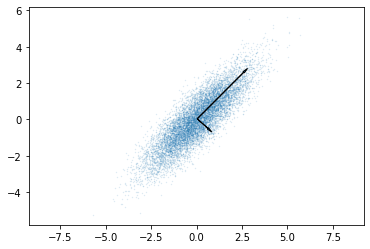

In [3]:
mean = np.array((0, 0))
cov = np.array(((2, 1.7), (1.7, 2)))

np.random.seed(666)
data = np.random.multivariate_normal(mean, cov, 10000)

plt.scatter(data[:,0], data[:,1], s=0.1, alpha=0.2)

pca = PCA(n_components=2)
pca.fit(data)

for length, w in zip(pca.explained_variance_, pca.components_):
    
    v = w * np.sqrt(length) * 2
    
    plt.arrow(*(pca.mean_), *(pca.mean_ + v), length_includes_head=True,
              head_width=0.1, head_length=0.3)

plt.axis('equal')